## Veamos las trayects resepcto al CM de estos grupitos que parecen hacer espirales

In [1]:
#Quiero las 3 proyecs + comparar al CM (o la central tamb)

import pandas as pd #librería para datos
import matplotlib.pyplot as plt #para el hist
from scipy import stats as st
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                           AutoMinorLocator)
from numpy import linalg as LA

In [2]:
df_aux = pd.read_csv('InfoTree_327_M.dat', delimiter= '\s+', index_col=False,header=None)
#x,y,z,M*,a,redshift,t,ss
N = int((len(df_aux.columns) - 4)/4)
a = df_aux.loc[:,(4*N)]
redshift = 1/a - 1
t = df_aux.loc[:,(4*N)+2]

In [3]:
#Funcs

def CG_mu_dCM(FoF): #Metemos el #FoF identificado a z = 0.14
    
    df = pd.read_csv(f'InfoTree_{FoF}_M.dat', delimiter= '\s+', index_col=False,header=None)
    #x,y,z,M,a,z,t,ss
    
    N = int((len(df.columns) - 4)/4)
    M = df.loc[:,3*N:4*N -1]
    a = df.loc[:,(4*N)]
    redshift = 1/a - 1
    t = df.loc[:,(4*N)+2]
    ss = df.loc[:,(4*N)+3]
                        
    #Antes de nada, corrijamos por periodicidad:

    X = [df.loc[:,i] for i in range(N)]
    Y = [df.loc[:,i+N] for i in range(N)]
    Z = [df.loc[:,i+2*N] for i in range(N)]
    
    M_i = []

    for i in range(N):
        m = np.array(df.loc[:,i+(3*N)])
        M_i.append(m)
            
    X_cm = np.empty(len(df)) #Centroide
    Y_cm = np.empty(len(df))
    Z_cm = np.empty(len(df))

    for i in range(len(df)):
        Sx = 0
        Sy = 0
        Sz = 0
        
        M_T_i = 0 #M*_T(t)

        for j in range(N):
            M_T_i += M_i[j][i]
            if X[j][i] > -80_000:
                Sx += X[j][i] * M_i[j][i]
            if Y[j][i] > -80_000:
                Sy += Y[j][i] * M_i[j][i]
            if Z[j][i] > -80_000:
                Sz += Z[j][i] * M_i[j][i]

        X_cm[i] = Sx/M_T_i
        Y_cm[i] = Sy/M_T_i
        Z_cm[i] = Sz/M_T_i #Efectivamente el CM...

    xx = [] #acomodamos por cm
    yy = []
    zz = []

    for i in range(N):
        x = np.array(df.loc[:,i]) - X_cm
        xx.append(x)

        y = np.array(df.loc[:,i+N]) - Y_cm
        yy.append(y)

        z = np.array(df.loc[:,i+(2*N)]) - Z_cm
        zz.append(z)
        
    #Veamos el d_i,CM(t)
    d_cm = [] #lista de listas...

    for i in range(N):
        d_aux = []
        for j in range(len(df)):
            d_i_t = (xx[i][j],yy[i][j],zz[i][j])
            d_i_t = LA.norm(d_i_t)
            d_aux.append(d_i_t)
        d_cm.append(d_aux)
        
    #Ahora tengo que barrer a c/ t los N miembros...
    d_prom = [] #dist prom al CM
    for j in range(len(df)):
        d_aux = []
        for i in range(N):
            d_i_t = (xx[i][j],yy[i][j],zz[i][j])
            d_i_t = LA.norm(d_i_t)
            d_aux.append(d_i_t)
        d_prom.append(np.mean(d_aux))
            
    return d_cm,d_prom,M #Para desp discriminar cuándo si y cuándo no

In [4]:
FoF_z0 = [132,327]

d_cm = [] #Lista de listas...
d_prom = []
Mi_z0 = []

for i in FoF_z0:
    aux1,aux2,aux3 = CG_mu_dCM(i)
    d_cm.append(aux1)
    d_prom.append(aux2)
    Mi_z0.append(aux3)

In [10]:
#Plot:

def PlotCG_CM(FoF):
    
    df = pd.read_csv(f'InfoTree_{FoF}_M.dat', delimiter= '\s+', index_col=False,header=None)
    #x,y,z,M,a,z,t,ss
    
    N = int((len(df.columns) - 4)/4)
    M = df.loc[:,3*N:4*N -1]
    a = df.loc[:,(4*N)]
    redshift = 1/a - 1
    t = df.loc[:,(4*N)+2]
    ss = df.loc[:,(4*N)+3]
                        
    X = [df.loc[:,i] for i in range(N)]
    Y = [df.loc[:,i+N] for i in range(N)]
    Z = [df.loc[:,i+2*N] for i in range(N)]
    
    M_i = []

    for i in range(N):
        m = np.array(df.loc[:,i+(3*N)])
        M_i.append(m)
            
    X_cm = np.empty(len(df)) #Centroide
    Y_cm = np.empty(len(df))
    Z_cm = np.empty(len(df))

    for i in range(len(df)):
        Sx = 0
        Sy = 0
        Sz = 0
        
        M_T_i = 0 #M*_T(t)

        for j in range(N):
            M_T_i += M_i[j][i]
            if X[j][i] > -80_000:
                Sx += X[j][i] * M_i[j][i]
            if Y[j][i] > -80_000:
                Sy += Y[j][i] * M_i[j][i]
            if Z[j][i] > -80_000:
                Sz += Z[j][i] * M_i[j][i]

        X_cm[i] = Sx/M_T_i
        Y_cm[i] = Sy/M_T_i
        Z_cm[i] = Sz/M_T_i #Efectivamente el CM...

    xx = [] #acomodamos por cm
    yy = []
    zz = []

    for i in range(N):
        x = np.array(df.loc[:,i]) - X_cm
        xx.append(x)

        y = np.array(df.loc[:,i+N]) - Y_cm
        yy.append(y)

        z = np.array(df.loc[:,i+(2*N)]) - Z_cm
        zz.append(z)
        
    #Calculo los Rp a z = 0 en cada proyec:
    #¿Podría aprovechar esto para el mu_r(t)?
    r_xy = []
    r_xz = []
    r_zy = []
    
    #Busco los R_ij max
    for j in range(N):
        #XY
        d_xy = (xx[j][0],yy[j][0]) #vector resta de posiciones entre k y el CM (2-D)
        d_xy = LA.norm(d_xy) #Distancia de cada miembro al centro geométrico
        r_xy.append(d_xy)
            
        #XZ
        d_xz = (xx[j][0],zz[j][0]) #vector resta de posiciones entre k y el CM (2-D)
        d_xz = LA.norm(d_xz) #Distancia de cada miembro al centro geométrico
        r_xz.append(d_xz)
        
        #ZY
        d_zy = (zz[j][0],yy[j][0]) #vector resta de posiciones entre k y el CM (2-D)
        d_zy = LA.norm(d_zy) #Distancia de cada miembro al centro geométrico
        r_zy.append(d_zy)
        
    r_xy = max(r_xy)
    r_xz = max(r_xz)
    r_zy = max(r_zy)
        
    #Ahora quiero mostrar las 3 proyeccs (xy,xz,yz) + discriminar los que valen (marcando el circulo que circunscribe a todos...)
    fig = plt.figure(figsize=(16,16))
    gs = fig.add_gridspec(2,2, hspace=0, wspace=0,width_ratios=(1,1),height_ratios=(1,1))
    (ax1, ax2), (ax3, ax4)= gs.subplots() #sharey='row',sharex='col')
    
    lims = 800 #kpc
    skip = 50 #Hasta qué ss (50 => z = 1)

    #XY
    R_xy = plt.Circle((0,0),r_xy,color='k',fill=False,ls='--',lw=2,alpha=0.7)
    ax1.add_patch(R_xy)
    for i in range(N):
        ax1.plot(xx[i][:skip],yy[i][:skip],lw = 2)
        ax1.scatter(xx[i][0],yy[i][0],label=f'CG {FoF} z = 0',marker='*',s=150)
    ax1.scatter(0,0,c='k',marker='+',label='Centroide',s=50)
    
    ax1.set_xlim(-lims,lims)
    ax1.set_ylim(-lims,lims)
    #plt.xlabel('x [kpc]',fontsize=20)
    ax1.set_ylabel('y [kpc]',fontsize=20)
    ax1.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax1.tick_params(axis="y",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    ax1.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
    
    #ZY
    R_zy = plt.Circle((0,0),r_zy,color='k',fill=False,ls='--',lw=2,alpha=0.7)
    ax2.add_patch(R_zy)
    for i in range(N):
        ax2.plot(zz[i][:skip],yy[i][:skip],lw = 2)
        ax2.scatter(zz[i][0],yy[i][0],label=f'CG{FoF}, {i}',marker='*',s=150)
    ax2.scatter(0,0,c='k',marker='+',label='CM',s=50)
    
    ax2.set_xlim(-lims,lims)
    ax2.set_ylim(-lims,lims)
    ax2.set_xlabel('z [kpc]',fontsize=20)
    ax2.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax2.tick_params(axis="y",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax2.xaxis.set_minor_locator(AutoMinorLocator())
    ax2.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
    ax2.yaxis.set_ticks_position('right')
    
    #XZ
    R_xz = plt.Circle((0,0),r_xz,color='k',fill=False,ls='--',lw=2,alpha=0.7)
    ax3.add_patch(R_xz)
    for i in range(N):
        ax3.plot(xx[i][:skip],zz[i][:skip],lw = 2)
        ax3.scatter(xx[i][0],zz[i][0],label=f'CG {FoF} z = 0',marker='*',s=150)
    ax3.scatter(0,0,c='k',marker='+',label='Centroide',s=50)
    
    ax3.set_xlim(-lims,lims)
    ax3.set_ylim(-lims,lims)
    ax3.set_xlabel('x [kpc]',fontsize=20)
    ax3.set_ylabel('z [kpc]',fontsize=20)
    ax3.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax3.tick_params(axis="y",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax3.xaxis.set_minor_locator(AutoMinorLocator())
    ax3.yaxis.set_minor_locator(AutoMinorLocator())
    ax3.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
    
    #En caso de que quiera el d_ij(t)
    ax4.plot(t[:skip],d_prom[FoF_z0.index(FoF)][:skip],lw=2,alpha=0.8,c='k',ls='--') #Esto para todo la misma línea
    ax4.scatter(t[0],d_prom[FoF_z0.index(FoF)][0],marker='o',s=75,label=f'CG {i}',c='k',alpha=0.8) #Esto para todo la misma línea
    ax4.set_xlim(t[49]-0.1,14)
    ax4.set_ylim(0,2000) #Esto se puede cambiar
    ax4.set_xlabel('$t_{cosmic}$ [Gyrs]',fontsize=20)
    ax4.set_ylabel('$\overline{d}_{CM}$ [kpc]',fontsize=20)
    
    #En caso de que quiera la dist a la central(t)
    for i in range(N):
        ax4.plot(t[:skip],d_cm[FoF_z0.index(FoF)][i][:skip],lw=2) #Esto para todo la misma línea
        ax4.scatter(t[0],d_cm[FoF_z0.index(FoF)][i][0],marker='o',s=75,label='') #Esto para todo la misma línea
    ax4.set_xlim(t[49]-0.1,14)
    ax4.set_ylim(0,2000) #Esto se puede cambiar
    ax4.set_xlabel('$t_{cosmic}$ [Gyrs]',fontsize=20)
    ax4.set_ylabel('$\overline{d}_{CM}$ [kpc]',fontsize=20)
    
    #En caso de que quiera M_i(t)
    """for i in range(N):
        ax4.plot(t[:50],np.log10(Mi_z0[FoF_z0.index(FoF)][3*N+i]),lw=2) #Esto para todo la misma línea
        ax4.scatter(t[0],np.log10(Mi_z0[FoF_z0.index(FoF)][3*N+i][0]),marker='o',s=75,label='Chopped hasta $t_{cosmic} = 10$ Gyrs') #Esto para todo la misma línea
    ax4.set_xlim(t[49]-0.1,14)
    ax4.set_ylim(9,12) #Esto se puede cambiar
    ax4.set_xlabel('$t_{cosmic}$ [Gyrs]',fontsize=20)
    ax4.set_ylabel('log $M_{ij}$ [$M_{\odot}$]',fontsize=20)""";
    
    ax4.yaxis.set_label_position('right')
    ax4.yaxis.set_ticks_position('right')
    ax4.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=False, left=False, right=True)
    ax4.tick_params(axis="y",labelsize=20,width=3,length=8,direction='in',bottom=True, top=False, left=False, right=True)
    ax4.xaxis.set_minor_locator(AutoMinorLocator())
    ax4.yaxis.set_minor_locator(AutoMinorLocator())
    ax4.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=False, left=False, right=True)
    
    ax2.legend(loc='best',fontsize=10,shadow=True)#bbox_to_anchor=(0.75,-0.7))
    #ax4.set_frame_on(False) 
    #ax4.legend(loc='lower right',fontsize=10,shadow=True)
    
    #plt.savefig(f'{FoF}_d_CM.jpg',dpi=150,bbox_inches='tight');
    
    plt.show()
    plt.close()

    return

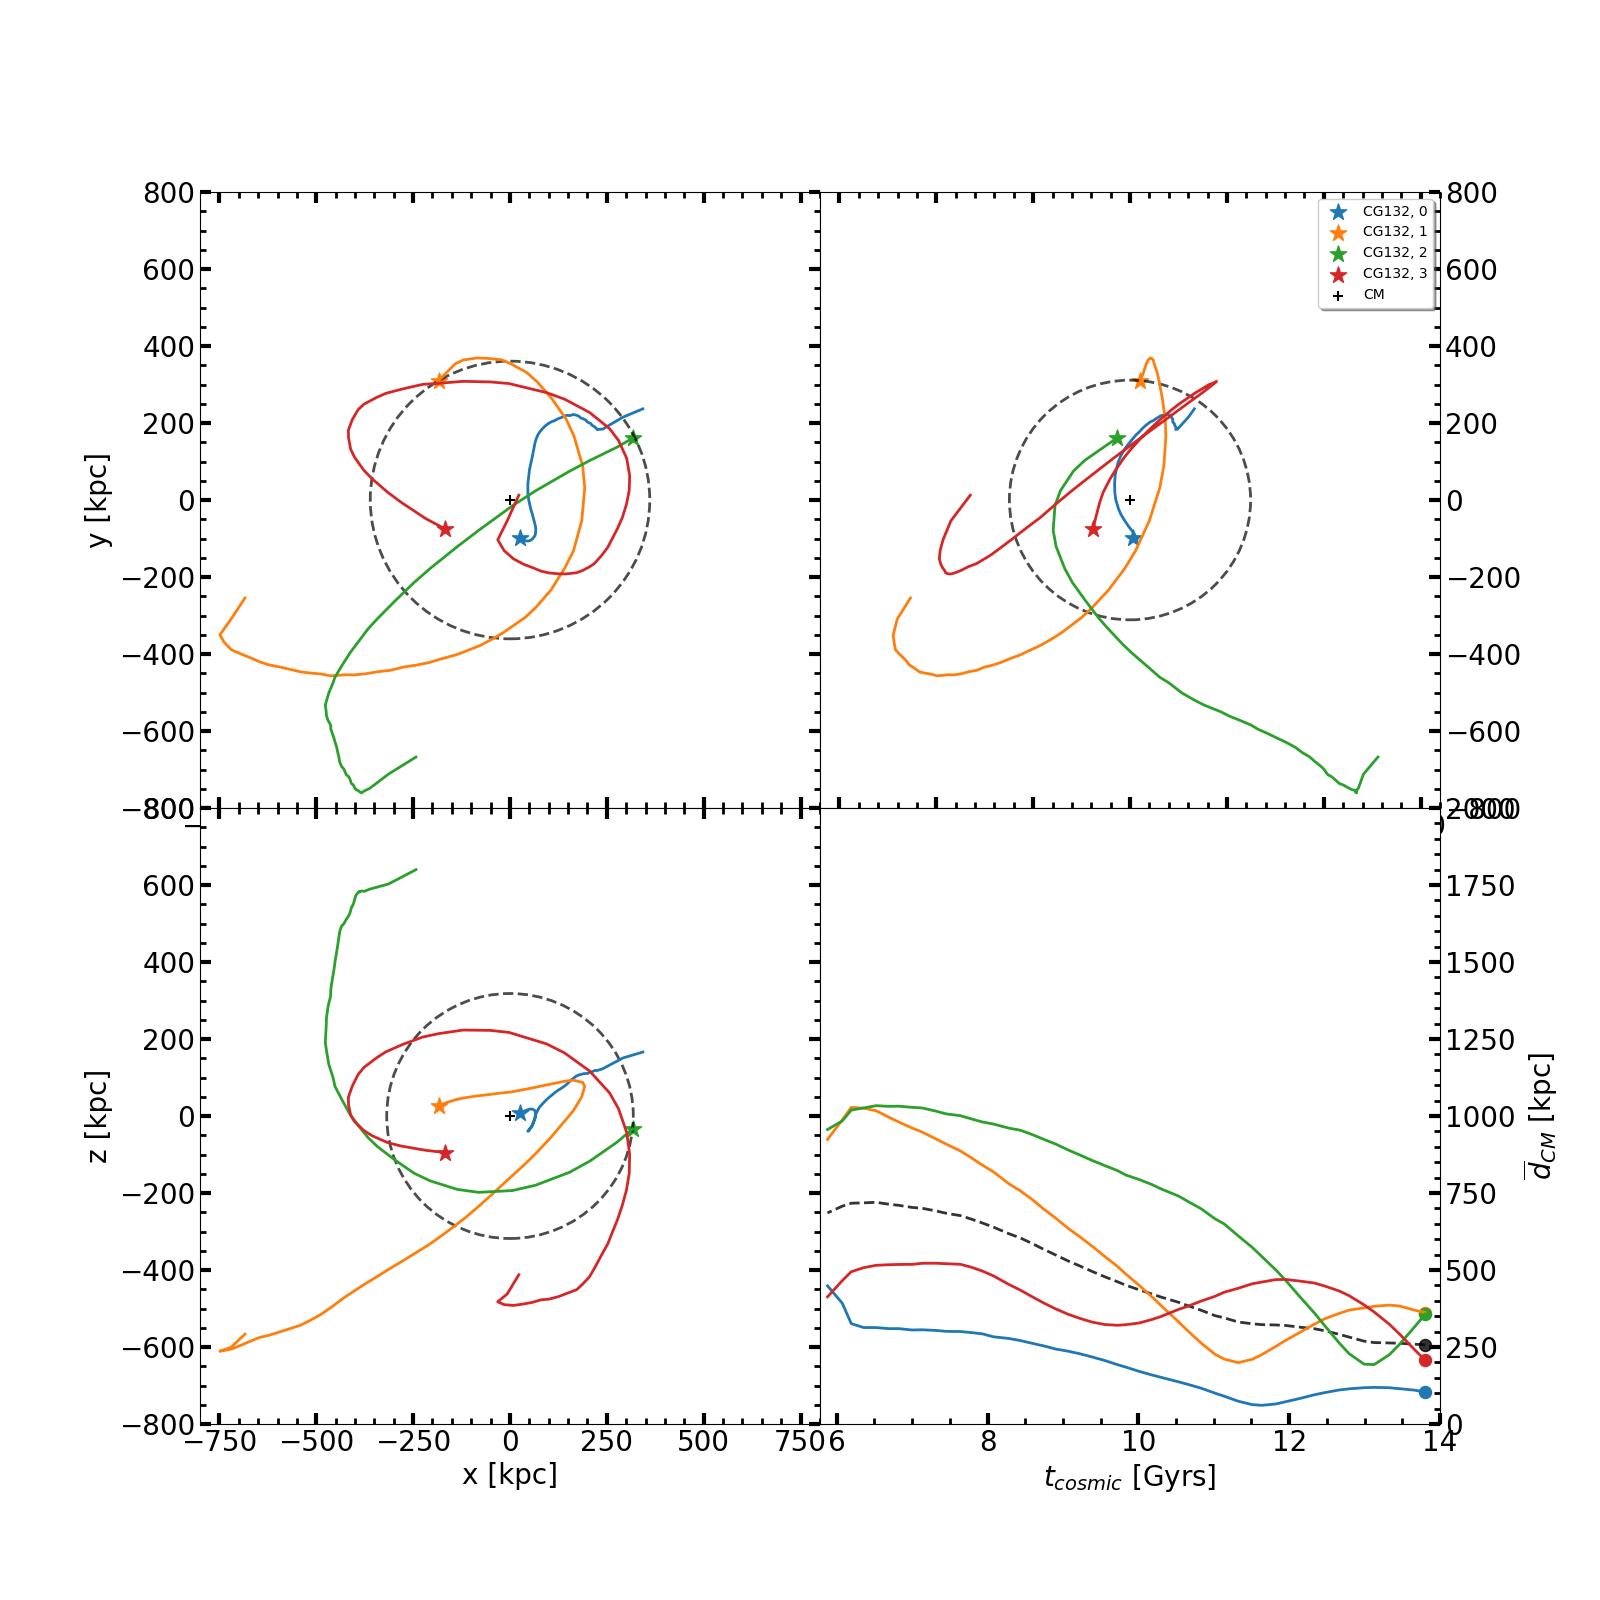

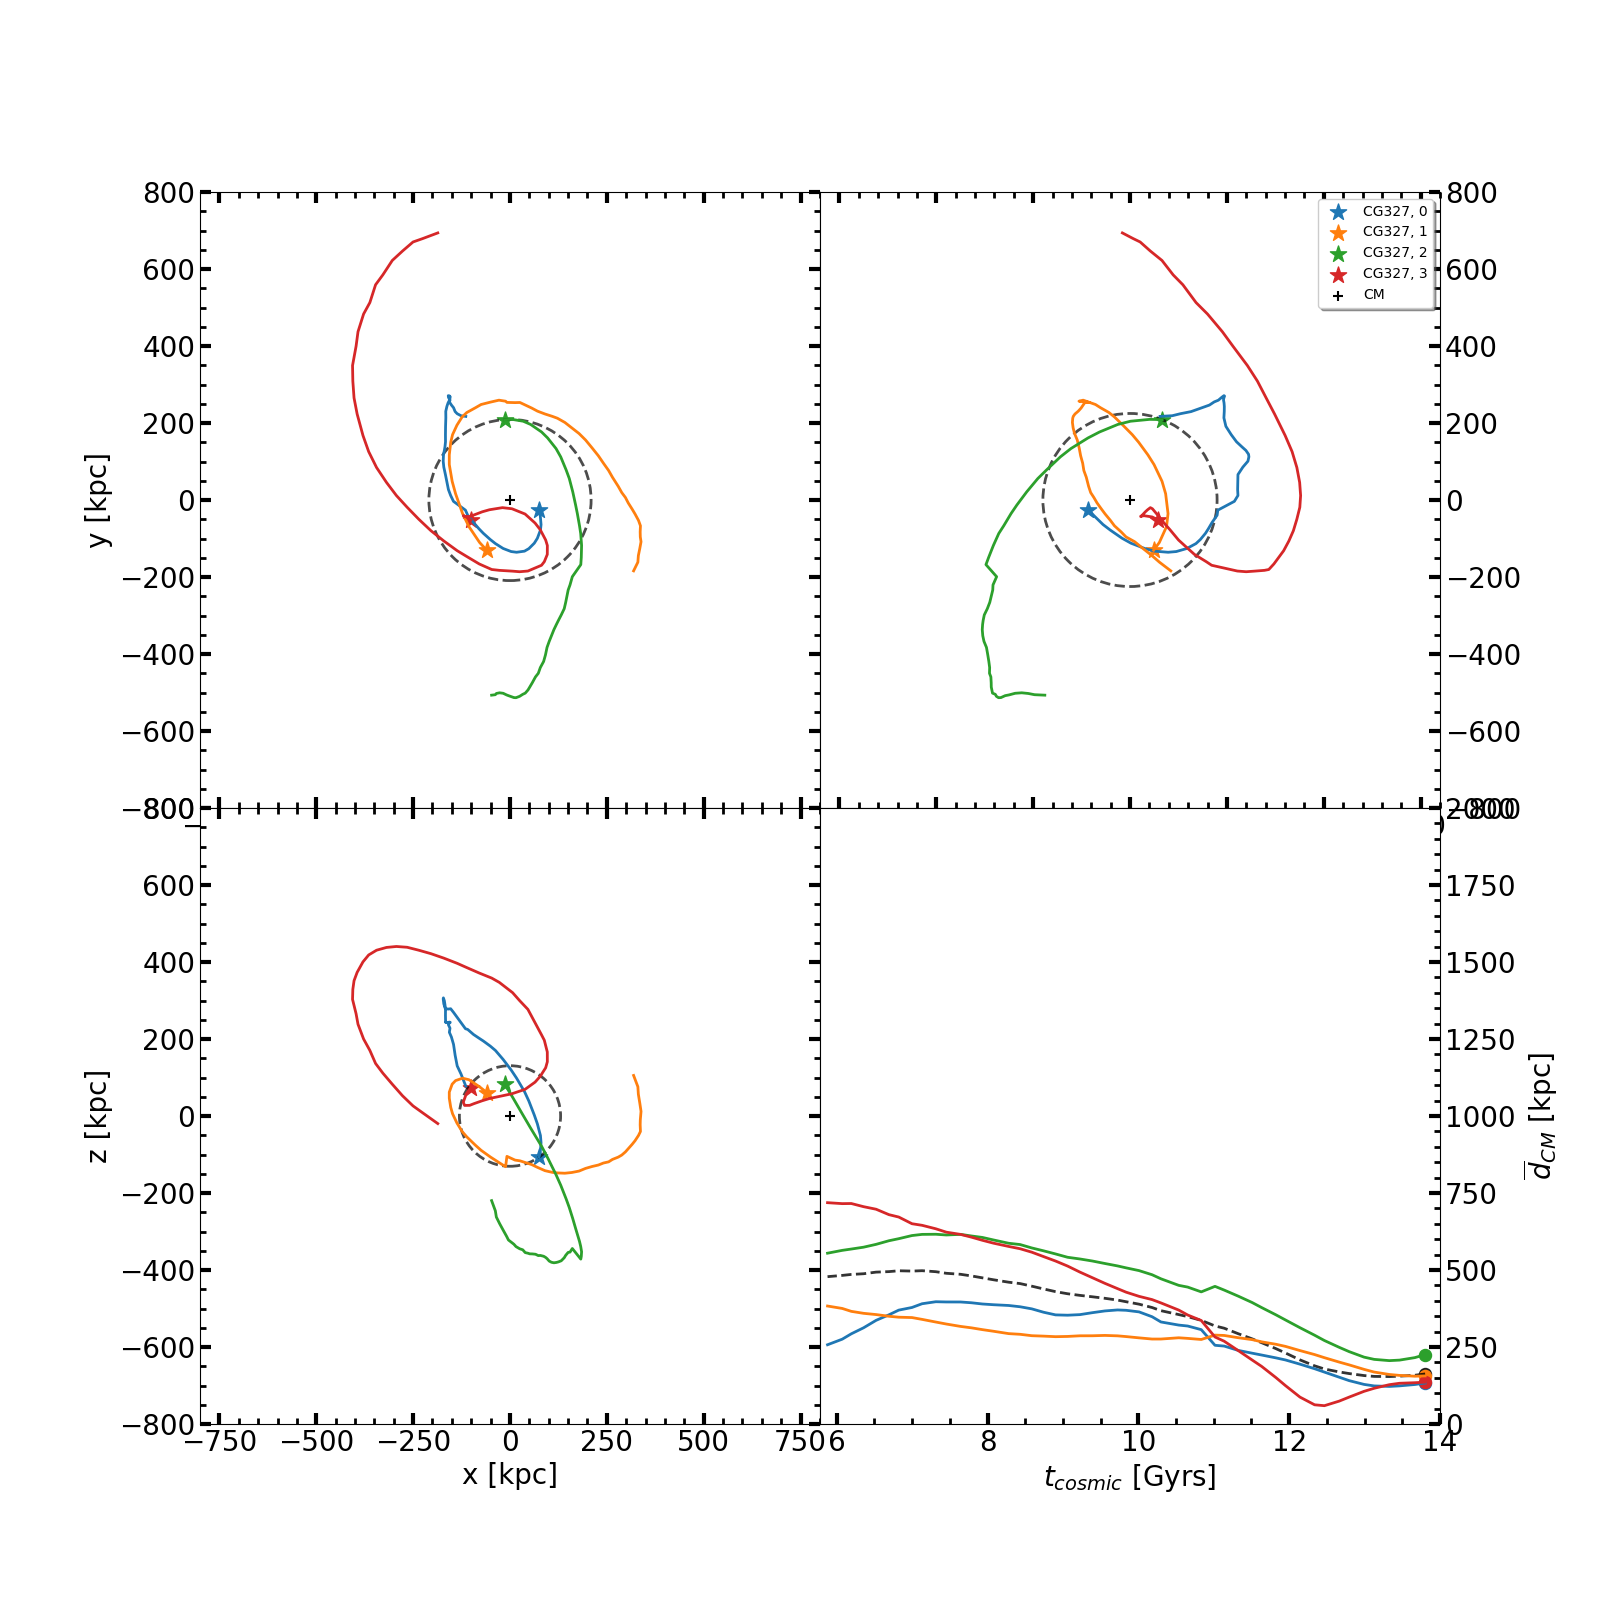

In [9]:
for i in FoF_z0:
    PlotCG_CM(i)

In [7]:
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

In [21]:
#Plot 3D:

def PlotCG_3D(FoF):
    
    df = pd.read_csv(f'InfoTree_{FoF}_M.dat', delimiter= '\s+', index_col=False,header=None)
    #x,y,z,M,a,z,t,ss
    
    N = int((len(df.columns) - 4)/4)
    M = df.loc[:,3*N:4*N -1]
    a = df.loc[:,(4*N)]
    redshift = 1/a - 1
    t = df.loc[:,(4*N)+2]
    ss = df.loc[:,(4*N)+3]
                        
    X = [df.loc[:,i] for i in range(N)]
    Y = [df.loc[:,i+N] for i in range(N)]
    Z = [df.loc[:,i+2*N] for i in range(N)]
    
    M_i = []

    for i in range(N):
        m = np.array(df.loc[:,i+(3*N)])
        M_i.append(m)
            
    X_cm = np.empty(len(df)) #Centroide
    Y_cm = np.empty(len(df))
    Z_cm = np.empty(len(df))

    for i in range(len(df)):
        Sx = 0
        Sy = 0
        Sz = 0
        
        M_T_i = 0 #M*_T(t)

        for j in range(N):
            M_T_i += M_i[j][i]
            if X[j][i] > -80_000:
                Sx += X[j][i] * M_i[j][i]
            if Y[j][i] > -80_000:
                Sy += Y[j][i] * M_i[j][i]
            if Z[j][i] > -80_000:
                Sz += Z[j][i] * M_i[j][i]

        X_cm[i] = Sx/M_T_i
        Y_cm[i] = Sy/M_T_i
        Z_cm[i] = Sz/M_T_i #Efectivamente el CM...

    xx = [] #acomodamos por cm
    yy = []
    zz = []

    for i in range(N):
        x = np.array(df.loc[:,i]) - X_cm
        xx.append(x)

        y = np.array(df.loc[:,i+N]) - Y_cm
        yy.append(y)

        z = np.array(df.loc[:,i+(2*N)]) - Z_cm
        zz.append(z)
        
    #Calculo los Rp a z = 0 en cada proyec:
    #¿Podría aprovechar esto para el mu_r(t)?
    r_xy = []
    r_xz = []
    r_zy = []
    
    #Busco los R_ij max
    for j in range(N):
        #XY
        d_xy = (xx[j][0],yy[j][0]) #vector resta de posiciones entre k y el CM (2-D)
        d_xy = LA.norm(d_xy) #Distancia de cada miembro al centro geométrico
        r_xy.append(d_xy)
            
        #XZ
        d_xz = (xx[j][0],zz[j][0]) #vector resta de posiciones entre k y el CM (2-D)
        d_xz = LA.norm(d_xz) #Distancia de cada miembro al centro geométrico
        r_xz.append(d_xz)
        
        #ZY
        d_zy = (zz[j][0],yy[j][0]) #vector resta de posiciones entre k y el CM (2-D)
        d_zy = LA.norm(d_zy) #Distancia de cada miembro al centro geométrico
        r_zy.append(d_zy)
        
    r_xy = max(r_xy)
    r_xz = max(r_xz)
    r_zy = max(r_zy)
    
    lims = 800 #kpc
    skip = 50 #Hasta qué ss (50 => z = 1)
    
    fig = plt.figure(figsize=(8,8))
    #ax = plt.axes(projection='3d')
    #fig = plt.figure()
    ax = Axes3D(fig)
    
    #R_zy = plt.Circle((0,0),r_zy,color='k',fill=False,ls='--',lw=2,alpha=0.7)
    #ax2.add_patch(R_zy)
    
    for i in range(N):
        ax.plot(xx[i][:skip],yy[i][:skip],zz[i][:skip],lw = 2)
        ax.scatter(xx[i][0],yy[i][0],zz[i][0],label=f'CG {FoF},{i} z = 0',marker='*',s=150)
    ax.scatter(0,0,0,c='k',marker='+',label='CM',s=50)

    ax.set_xlim(-lims,lims)
    ax.set_ylim(-lims,lims)
    ax.set_zlim(-lims,lims)
    ax.set_xlabel('x [kpc]',fontsize=20)
    ax.set_ylabel('y [kpc]',fontsize=20)
    ax.set_zlabel('z [kpc]',fontsize=20)
    ax.tick_params(axis="x",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax.tick_params(axis="y",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax.tick_params(axis="z",labelsize=20,width=3,length=8,direction='in',bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_minor_locator(MultipleLocator(200))
    ax.yaxis.set_minor_locator(MultipleLocator(200))
    ax.zaxis.set_minor_locator(MultipleLocator(200))
    ax.tick_params(which='minor',length=4,direction='in',width=2,bottom=True, top=True, left=True, right=True)
    
    ax.legend(loc='best',fontsize=15,shadow=True)#bbox_to_anchor=(0.75,-0.7))
    
    lat = 60
    long = 10
    ax.view_init(elev=lat, azim=long)
    
    #plt.savefig(f'{FoF}_{long}_{lat}.jpg',dpi=150,bbox_inches='tight');
    
    plt.show()
    #plt.close()

    return

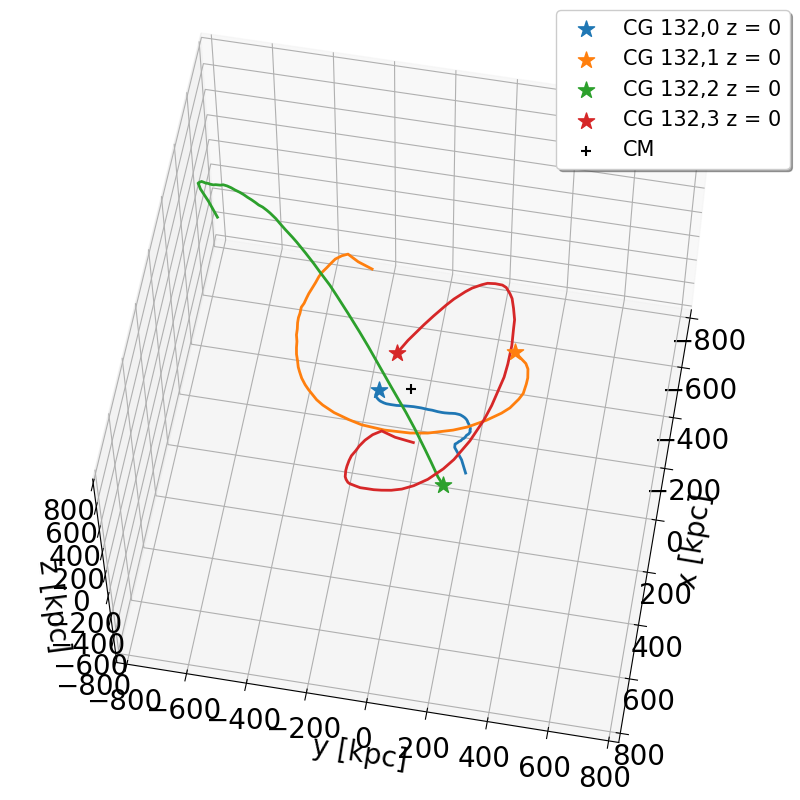

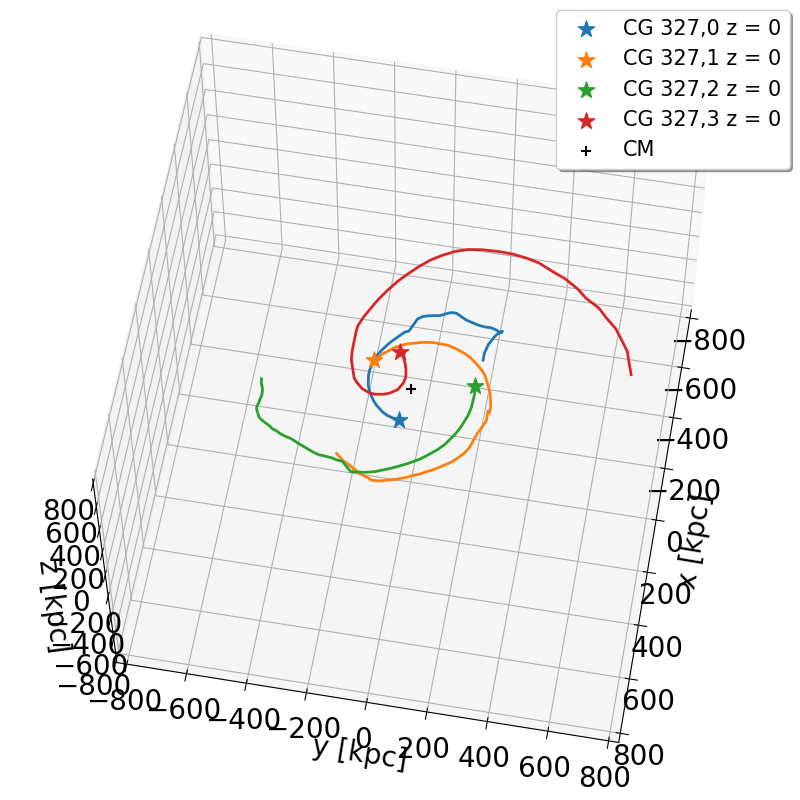

In [22]:
for i in FoF_z0:
    PlotCG_3D(i)